In [86]:
import os, sys
sys.path.append("../src")
import numpy as np
import torch
from utils.vit_util import ViTExperiment
import datasets
from datasets import Dataset, DatasetInfo, DatasetDict, load_from_disk, load_dataset
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tiny-ImageNetデータセットの読み込み

In [87]:
# datasetをロード (初回の読み込みだけやや時間かかる)
tiny_imagenet = load_from_disk(os.path.join(ViTExperiment.DATASET_DIR, "tiny-imagenet-200"))
# cifar100 = load_dataset("cifar10")
tiny_imagenet

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 100000
    })
    repair: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

In [89]:
print(tiny_imagenet["train"])
print(tiny_imagenet["repair"])
# print(tiny_imagenet["test"])

Dataset({
    features: ['img', 'label'],
    num_rows: 100000
})
Dataset({
    features: ['img', 'label'],
    num_rows: 10000
})


In [90]:
train_ds = tiny_imagenet["train"]
train_ds[0]

{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64>,
 'label': 59}

In [91]:
train_ds["label"]

[59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,


In [92]:
print(train_ds.features)

{'img': Image(decode=True, id=None), 'label': ClassLabel(names=['Egyptian cat', 'reel', 'volleyball', 'rocking chair, rocker', 'lemon', 'bullfrog, Rana catesbeiana', 'basketball', 'cliff, drop, drop-off', 'espresso', "plunger, plumber's helper", 'parking meter', 'German shepherd, German shepherd dog, German police dog, alsatian', 'dining table, board', 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus', 'brown bear, bruin, Ursus arctos', 'school bus', 'pizza, pizza pie', 'guinea pig, Cavia cobaya', 'umbrella', 'organ, pipe organ', 'oboe, hautboy, hautbois', 'maypole', 'goldfish, Carassius auratus', 'potpie', 'hourglass', 'seashore, coast, seacoast, sea-coast', 'computer keyboard, keypad', 'Arabian camel, dromedary, Camelus dromedarius', 'ice cream, icecream', 'nail', 'space heater', 'cardigan', 'baboon', 'snail', 'coral reef', 'albatross, mollymawk', "spider web, spider's web", 'sea cucumber, holothurian', 'backpack, back pack, knapsack, packsack, rucksack, haversack', 

In [93]:
import pandas as pd

tiny_imagenet.set_format("pandas")
df = tiny_imagenet["train"][:]
df.head()

,img,label
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,59
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,59
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,59
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,59
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,59


In [94]:
def label_int2str(row):
    return tiny_imagenet["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,img,label,label_name
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,59,fur coat
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,59,fur coat
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,59,fur coat
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,59,fur coat
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,59,fur coat


In [95]:
df["label_name"].value_counts(ascending=True)

fur coat                                                            500
oboe, hautboy, hautbois                                             500
teapot                                                              500
iPod                                                                500
umbrella                                                            500
                                                                   ... 
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus    500
sombrero                                                            500
tarantula                                                           500
cauliflower                                                         500
European fire salamander, Salamandra salamandra                     500
Name: label_name, Length: 200, dtype: int64

In [96]:
# pandas形式のデータセットをリセット
tiny_imagenet.reset_format()

# データセットの前処理
ViTで使われている前処理を適用する．

In [97]:
from transformers import ViTImageProcessor

# 今回は https://huggingface.co/google/vit-base-patch16-224-in21k を利用
model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)
processor

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [98]:
# 前処理を5件のサンプルに適用してみる
processed_imgs = processor(images=train_ds[:5]["img"], return_tensors="pt")
processed_imgs["pixel_values"].shape # (batch, channel, height, width)になっている

torch.Size([5, 3, 224, 224])

In [99]:
processor.model_input_names # モデルがフォワードパスで期待するフィールド名

['pixel_values']

In [100]:
def transforms(batch):
    # 画像のバッチを変換してtorch.tensorにする
    inputs = processor(images=batch["img"], return_tensors="pt")

    # ラベルのフィールドも前処理時に追加
    inputs["labels"] = batch["label"]
    return inputs

In [101]:
transformed_ex = transforms(train_ds[:5])
print(transformed_ex)
print(transformed_ex["pixel_values"].size())
print(len(transformed_ex["labels"]))

{'pixel_values': tensor([[[[ 0.0824,  0.0824,  0.0824,  ..., -0.0353, -0.0353, -0.0353],
          [ 0.0824,  0.0824,  0.0824,  ..., -0.0353, -0.0353, -0.0353],
          [ 0.0824,  0.0824,  0.0824,  ..., -0.0353, -0.0353, -0.0353],
          ...,
          [-0.0824, -0.0824, -0.0824,  ..., -0.1059, -0.0980, -0.0980],
          [-0.0824, -0.0824, -0.0745,  ..., -0.1059, -0.1059, -0.1059],
          [-0.0824, -0.0824, -0.0745,  ..., -0.1059, -0.1059, -0.1059]],

         [[ 0.1294,  0.1294,  0.1294,  ...,  0.0667,  0.0667,  0.0667],
          [ 0.1294,  0.1294,  0.1294,  ...,  0.0667,  0.0667,  0.0667],
          [ 0.1294,  0.1294,  0.1294,  ...,  0.0667,  0.0667,  0.0667],
          ...,
          [-0.0510, -0.0510, -0.0510,  ..., -0.0902, -0.0745, -0.0745],
          [-0.0510, -0.0510, -0.0431,  ..., -0.0902, -0.0824, -0.0824],
          [-0.0510, -0.0510, -0.0431,  ..., -0.0902, -0.0824, -0.0824]],

         [[ 0.2235,  0.2235,  0.2235,  ...,  0.1373,  0.1373,  0.1373],
          [ 0

In [102]:
# cifar10_preprocessed = cifar10.map(preprocess, batched=True, batch_size=None)
# 上記だと時間がかかるので必要な時にリアルタイムで前処理を適用するようにする
tiny_imagenet_preprocessed = tiny_imagenet.with_transform(transforms)

In [103]:
tiny_imagenet_preprocessed

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 100000
    })
    repair: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

In [104]:
# 形状が224x224になっていることを確認
print(tiny_imagenet_preprocessed["train"][:5])
print(tiny_imagenet_preprocessed["train"][:5].keys())
print(tiny_imagenet_preprocessed["train"][:5]["pixel_values"].shape)
# 変換前
print(tiny_imagenet["train"][:5])
print(tiny_imagenet["train"][:5].keys())
print(tiny_imagenet["train"][:5]["img"])

{'pixel_values': tensor([[[[ 0.0824,  0.0824,  0.0824,  ..., -0.0353, -0.0353, -0.0353],
          [ 0.0824,  0.0824,  0.0824,  ..., -0.0353, -0.0353, -0.0353],
          [ 0.0824,  0.0824,  0.0824,  ..., -0.0353, -0.0353, -0.0353],
          ...,
          [-0.0824, -0.0824, -0.0824,  ..., -0.1059, -0.0980, -0.0980],
          [-0.0824, -0.0824, -0.0745,  ..., -0.1059, -0.1059, -0.1059],
          [-0.0824, -0.0824, -0.0745,  ..., -0.1059, -0.1059, -0.1059]],

         [[ 0.1294,  0.1294,  0.1294,  ...,  0.0667,  0.0667,  0.0667],
          [ 0.1294,  0.1294,  0.1294,  ...,  0.0667,  0.0667,  0.0667],
          [ 0.1294,  0.1294,  0.1294,  ...,  0.0667,  0.0667,  0.0667],
          ...,
          [-0.0510, -0.0510, -0.0510,  ..., -0.0902, -0.0745, -0.0745],
          [-0.0510, -0.0510, -0.0431,  ..., -0.0902, -0.0824, -0.0824],
          [-0.0510, -0.0510, -0.0431,  ..., -0.0902, -0.0824, -0.0824]],

         [[ 0.2235,  0.2235,  0.2235,  ...,  0.1373,  0.1373,  0.1373],
          [ 0

66 tabby, tabby cat


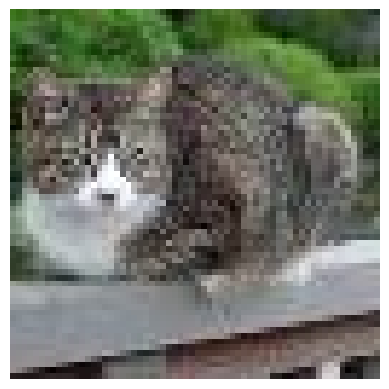

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


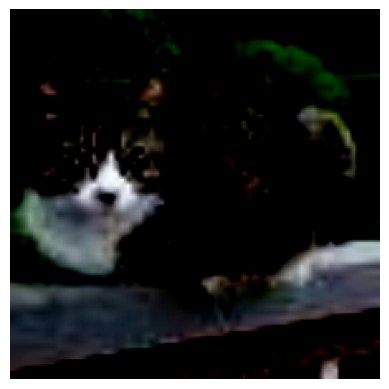

In [105]:
import torch
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

TMP_ID = 777

transform = transforms.ToTensor()
tensor = transform(tiny_imagenet["train"][TMP_ID]["img"])
print(tiny_imagenet["train"][TMP_ID]["label"], tiny_imagenet["train"].features["label"].int2str(tiny_imagenet["train"][TMP_ID]["label"]))
# テンソルを画像として表示します
plt.imshow(tensor.permute(1, 2, 0))  # テンソルの次元を(64, 64, 3)に変換して表示します
plt.axis('off')  # 軸を非表示にします
plt.show()

# テンソルを画像として表示します
plt.imshow(tiny_imagenet_preprocessed["train"][TMP_ID]["pixel_values"].permute(1, 2, 0))  # テンソルの次元を(64, 64, 3)に変換して表示します
plt.axis('off')  # 軸を非表示にします
plt.show()

In [58]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

# ViTのfine-tuningを行う

## 評価指標の設定

In [106]:
from datasets import list_metrics, load_metric
metrics_list = list_metrics()
len(metrics_list)

321

In [107]:
# accかf1を使いたい
wanted_list = ["acc", "f1"]
# wanted_listのどれかで始まるメトリクスをmetrics_listから取り出す
wanted_metrics = [metric for metric in metrics_list if any(metric.startswith(w) for w in wanted_list)]
wanted_metrics

['accuracy', 'f1']

In [108]:
met_acc = load_metric("accuracy")
met_f1 = load_metric("f1")

In [109]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = met_acc.compute(predictions=preds, references=labels)
    f1 = met_f1.compute(predictions=preds, references=labels, average="macro")
    return {
        "accuracy": acc,
        "f1": f1
    }

## pretrained modelのロード

In [111]:
from transformers import ViTForImageClassification

labels = tiny_imagenet_preprocessed["train"].features["label"].names
print(labels)

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
).to(device)

['Egyptian cat', 'reel', 'volleyball', 'rocking chair, rocker', 'lemon', 'bullfrog, Rana catesbeiana', 'basketball', 'cliff, drop, drop-off', 'espresso', "plunger, plumber's helper", 'parking meter', 'German shepherd, German shepherd dog, German police dog, alsatian', 'dining table, board', 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus', 'brown bear, bruin, Ursus arctos', 'school bus', 'pizza, pizza pie', 'guinea pig, Cavia cobaya', 'umbrella', 'organ, pipe organ', 'oboe, hautboy, hautbois', 'maypole', 'goldfish, Carassius auratus', 'potpie', 'hourglass', 'seashore, coast, seacoast, sea-coast', 'computer keyboard, keypad', 'Arabian camel, dromedary, Camelus dromedarius', 'ice cream, icecream', 'nail', 'space heater', 'cardigan', 'baboon', 'snail', 'coral reef', 'albatross, mollymawk', "spider web, spider's web", 'sea cucumber, holothurian', 'backpack, back pack, knapsack, packsack, rucksack, haversack', 'Labrador retriever', 'pretzel', 'king penguin, Aptenodytes pat

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [112]:
model.device # gpuに載ってることを確認

device(type='cuda', index=0)

## 訓練の設定をしてfine-tuneを実行

In [5]:
from transformers import TrainingArguments

batch_size = 64
logging_steps = len(cifar10_preprocessed["train"]) // batch_size
training_args = TrainingArguments(
    output_dir="./vit-c10",
    num_train_epochs=2,
    learning_rate=2e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    remove_unused_columns=False, # img列がないとエラーになるので必要
    evaluation_strategy="epoch",
    logging_strategy="epoch",
    push_to_hub=False,
    disable_tqdm=False,
    log_level="error",
)

2024-04-17 14:11:21.998871: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 14:11:26.375409: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-04-17 14:11:26.375591: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-04-17 14:11:26.375605: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

NameError: name 'cifar10_preprocessed' is not defined

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    train_dataset=cifar10_preprocessed["train"],
    tokenizer=processor,
)


# 訓練はpyファイルの方で終わっているので，そのモデルをロードして推論したい

In [2]:
from transformers import AutoModelForImageClassification, AutoTokenizer

In [3]:
# ロード
loaded_model = AutoModelForImageClassification.from_pretrained(f"/src/src/out_vit_c10").to(device)
loaded_model.eval()

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_

In [6]:
trainer = Trainer(
    model=loaded_model,
    args=training_args,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    train_dataset=cifar10_preprocessed["train"],
    tokenizer=processor,
)

NameError: name 'Trainer' is not defined

In [44]:
train_pred = trainer.predict(cifar10_preprocessed["train"])
test_pred = trainer.predict(cifar10_preprocessed["test"])

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(12, 12))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

In [65]:
import numpy as np
# 予測確率を取得
train_prob = np.argmax(train_pred.predictions, axis=1)
test_prob = np.argmax(test_pred.predictions, axis=1)
# train_pred, test_predに対応する正解ラベルのリストをそれぞれ取得
train_label = train_pred.label_ids
test_label = test_pred.label_ids

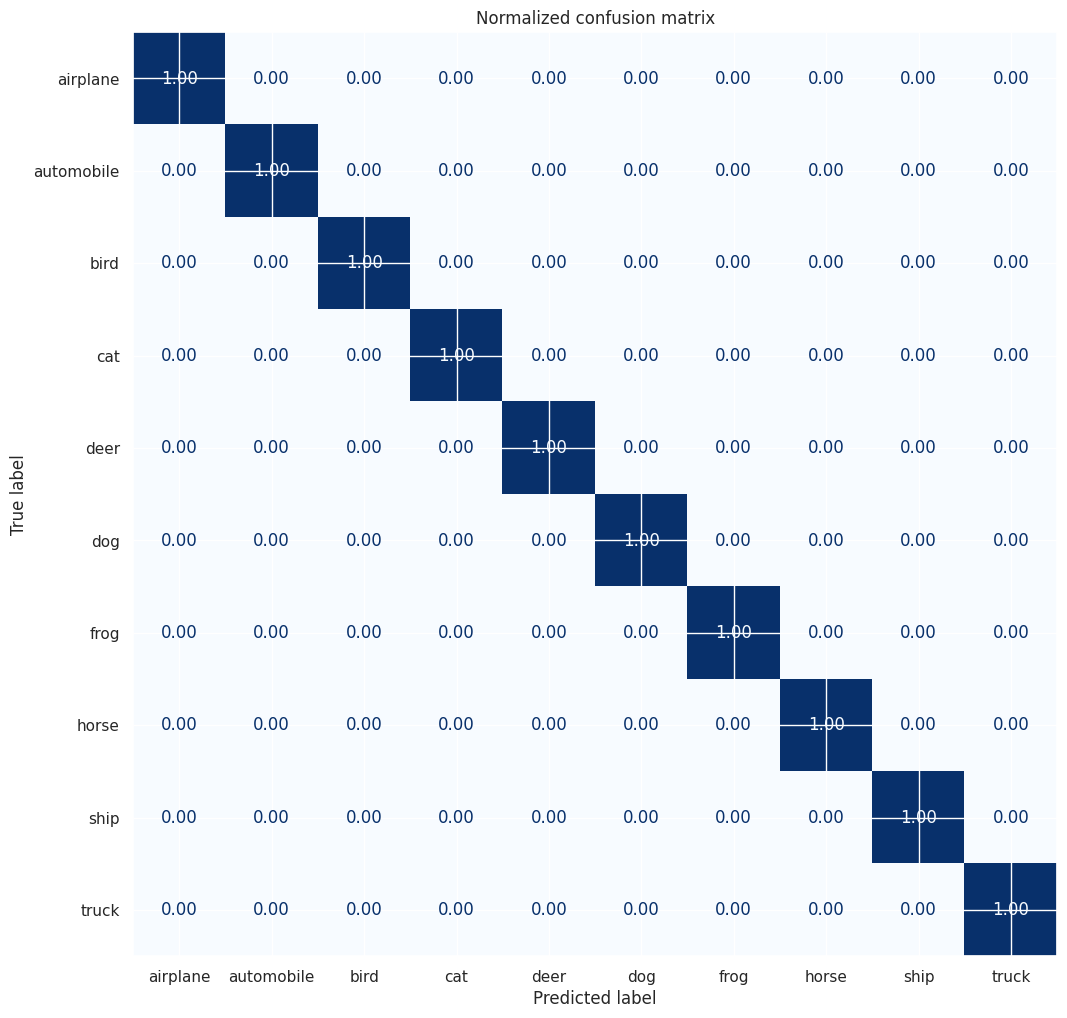

In [66]:
plot_confusion_matrix(train_prob, train_label, labels)

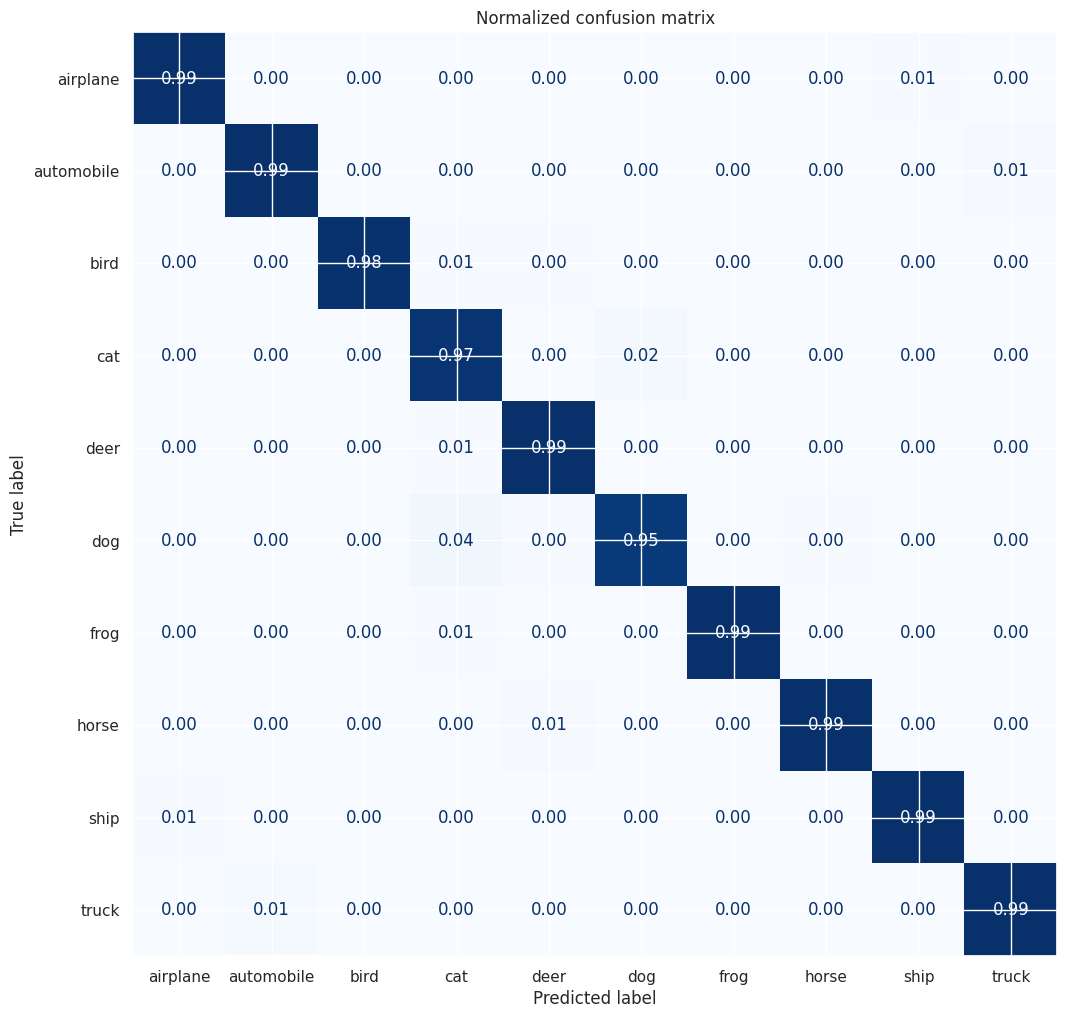

In [67]:
plot_confusion_matrix(test_prob, test_label, labels)

In [70]:
train_pred.metrics

{'test_loss': 0.005070374347269535,
 'test_accuracy': {'accuracy': 0.99916},
 'test_f1': {'f1': 0.9991599698695797},
 'test_runtime': 1968.5808,
 'test_samples_per_second': 25.399,
 'test_steps_per_second': 0.397}

In [71]:
test_pred.metrics

{'test_loss': 0.05960104987025261,
 'test_accuracy': {'accuracy': 0.9829},
 'test_f1': {'f1': 0.9829188809430107},
 'test_runtime': 392.0372,
 'test_samples_per_second': 25.508,
 'test_steps_per_second': 0.4}